In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt


In [2]:
df = pd.read_csv('AAPL.csv')
df= df.set_index(pd.DatetimeIndex(df['Date'].values))
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [3]:
def EMA(data, period=20,column='Close'):
    return data[column].ewm(span=period , adjust=False).mean()

In [4]:
def stockRSI(data,period=14,column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain = EMA(data , period , column='up')
    AVG_Loss= abs(EMA(data , period , column='down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0-(100.0/(1.0+RS))
    stockrsi = (RSI - RSI.rolling(period).min())/ (RSI.rolling(period).max()- RSI.rolling(period).min())
    return stockrsi

In [5]:
df['StockRSI']=stockRSI(df)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,up,down,StockRSI
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,NaN,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,1.110000,0.000000,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,0.000000,-3.060005,NaN
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,7.550003,0.000000,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,2.779999,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,3.769989,0.000000,0.890288
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,0.000000,-1.959992,0.788446
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,0.000000,-13.080002,0.275414
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,2.839997,0.000000,0.394734


(array([16436., 16617., 16801., 16983., 17167., 17348., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

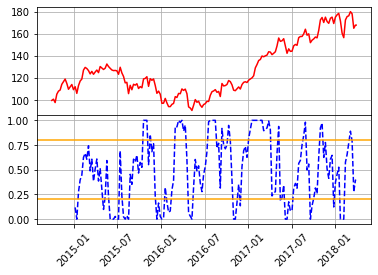

In [11]:
fig,(ax1,ax2)=plt.subplots(nrows=2,sharex=True)
plt.subplots_adjust(hspace=0)
ax1.grid()
ax2.grid()
ax1.plot(df.index,df['Close'],color='r')
ax2.plot(df.index,df['StockRSI'],color='b',linestyle='--')
ax2.axhline(0.20,color='orange')
ax2.axhline(0.80,color='orange')
plt.xticks(rotation=45)